In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

colorsBlue = ['#b3e5fc', '#0091ea']
colorsRed = ['#f18e86', '#e83b47']
colorsYellow = ['#fb9d32', '#fec787']
colorsPurple = ['#d69bc5' ,'#a8509f']
colorsGreyOrange = ['#c3c3c3', '#f8a834']
colors = [colorsBlue, colorsRed, colorsYellow, colorsPurple, colorsGreyOrange]

In [2]:
folder = '2024_0205'
vid = 'IMG_1893'
file = folder + '/' + vid

meta_df = pd.read_csv(folder + '/meta.csv')
df = pd.read_csv(file + '.csv')
data_df = pd.read_csv(file + '_data.csv')

# raw videos not provided due to space constraint
# cap = cv2.VideoCapture(file + '.MOV')

fps = 30 # cap.get(cv2.CAP_PROP_FPS)
print('frame rate {0:.2f} FPS'.format(fps))

frame_count = 405 # int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('total number of frames = {0}'.format(frame_count))

cvt_x = 20.2 / 500
cvt_y = 72.2 / 2000

frame rate 30.00 FPS
total number of frames = 405


In [3]:
F0 = meta_df.loc[meta_df['vid'] == vid, 'start_frame'].values[0] / fps

startF = meta_df.loc[meta_df['vid'] == vid, 'startF'].values[0] / fps - 0.1
DeltaF = meta_df.loc[meta_df['vid'] == vid, 'DeltaF'].values[0] / fps
DeltaX = meta_df.loc[meta_df['vid'] == vid, 'DeltaX'].values[0] * cvt_x
DeltaY = meta_df.loc[meta_df['vid'] == vid, 'DeltaY'].values[0] * cvt_y

cyc0 = meta_df.loc[meta_df['vid'] == vid, 'cycle_0'].values[0]
cyc1 = meta_df.loc[meta_df['vid'] == vid, 'cycle_1'].values[0]

In [4]:
Fm = data_df['frame'] / fps
Xrm = data_df['xn'] * cvt_x
Yrm = data_df['yn'] * cvt_y

FF = df['frame'] / fps
XX = df['xn'] * cvt_x
YY = df['yn'] * cvt_y

_Fm = data_df[Fm > startF]['frame'].values / fps
_Xrm = data_df[Fm > startF]['xn'].values * cvt_x
_Yrm = data_df[Fm > startF]['yn'].values * cvt_y

_FF = df[FF > startF]['frame'].values / fps
_XX = df[FF > startF]['xn'].values * cvt_x
_YY = df[FF > startF]['yn'].values * cvt_y

cycle = (_Fm - startF) // DeltaF
cycle = (cycle - cycle[0]).astype(int)

__Xrm = _Xrm - cycle * DeltaX
__Yrm = _Yrm - cycle * DeltaY
__Fm = _Fm - cycle * DeltaF - startF

cycle2 = (_FF - startF) // DeltaF
cycle2 = (cycle2 - cycle2[0]).astype(int)

__XX = _XX - cycle2 * DeltaX
__YY = _YY - cycle2 * DeltaY
__FF = _FF - cycle2 * DeltaF - startF

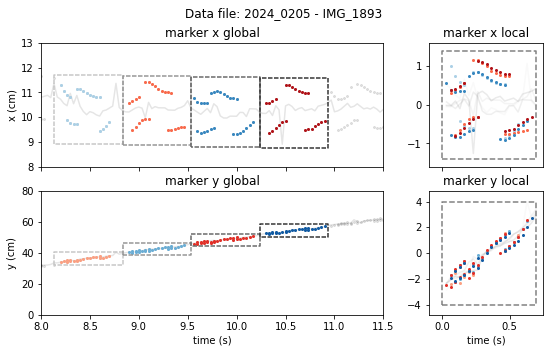

In [5]:
plot_cycle = np.arange(cyc0, cyc1 + 1)

fig, axes = plt.subplots(2, 2, figsize = (9, 5), sharex = 'col', gridspec_kw = {'width_ratios': [3, 1]})

axes[0, 0].plot(FF, XX, zorder = -1, c = 'black', alpha = 0.1)
axes[1, 0].plot(FF, YY, zorder = -1, c = 'black', alpha = 0.1)
axes[0, 0].scatter(Fm, Xrm, s = 4, zorder = -1, c = 'black', alpha = 0.1)
axes[1, 0].scatter(Fm, Yrm, s = 4, zorder = -1, c = 'black', alpha = 0.1)

DX = - 10.3 # - 9
DY = - 36.5 # - 24.4

ddx = 1.4

for i in plot_cycle:
    
    mask = (cycle == i)
    mask2 = (cycle2 == i)
    frac = (i + 2 - plot_cycle[0]) / (plot_cycle[-1] + 3 - plot_cycle[0])
    
    if i % 2 == 0:
        c1 = cm.Blues(frac)
        c2 = cm.Reds(frac)
        c3 = cm.Greys(frac)
    else:
        c2 = cm.Blues(frac)
        c1 = cm.Reds(frac)
        c3 = cm.Greys(frac)
    
    axes[0, 0].scatter(_Fm[mask], _Xrm[mask], color = c1, s = 4)
    axes[1, 0].scatter(_Fm[mask], _Yrm[mask], color = c2, s = 4)
    
    axes[0, 1].scatter(__Fm[mask], __Xrm[mask] + DX, color = c1, s = 4)
    axes[1, 1].scatter(__Fm[mask], __Yrm[mask] + DY, color = c2, s = 4)
    
    axes[0, 1].plot(__FF[mask2], __XX[mask2] + DX, color = c3, zorder = -10, alpha = 0.1)
    axes[1, 1].plot(__FF[mask2], __YY[mask2] + DY, color = c3, zorder = -10, alpha = 0.1)
    
    t0 = startF + i * DeltaF
    t1 = startF + (i + 1) * DeltaF
    
    x0 = (- DX + i * DeltaX) - ddx
    x1 = (- DX + i * DeltaX) + ddx
    
    y0 = (- DY + i * DeltaY) - 4
    y1 = (- DY + i * DeltaY) + 4
    
    axes[0, 0].plot([t0, t0, t1, t1, t0], [x0, x1, x1, x0, x0], color = c3, linestyle = '--', dashes = (3, 1))
    axes[1, 0].plot([t0, t0, t1, t1, t0], [y0, y1, y1, y0, y0], color = c3, linestyle = '--', dashes = (3, 1))

axes[0, 0].set_title('marker x global')
axes[1, 0].set_title('marker y global')

axes[0, 1].set_title('marker x local')
axes[1, 1].set_title('marker y local')
    
axes[0, 0].set_xlim(8, 11.5)


axes[0, 1].plot([0, DeltaF, DeltaF, 0, 0], [-ddx, -ddx, ddx, ddx, -ddx], color = 'grey', linestyle = 'dashed')
axes[1, 1].plot([0, DeltaF, DeltaF, 0, 0], [-4, -4, 4, 4, -4], color = 'grey', linestyle = 'dashed')

axes[0, 1].set_xlim(-0.1, 0.75)
# axes[0, 1].set_xticks([0, 1])

axes[0, 1].set_ylim(- (ddx + 0.2),  (ddx + 0.2))
axes[1, 1].set_ylim(-4.8, 4.8)

axes[0, 0].set_ylim(8, 13)
axes[1, 0].set_ylim(0, 80)

axes[0, 0].set_ylabel('x (cm)')
axes[1, 0].set_ylabel('y (cm)')

axes[1, 0].set_xlabel('time (s)')
axes[1, 1].set_xlabel('time (s)')

plt.suptitle('Data file: {0} - {1}'.format(folder, vid))

plt.savefig('plots/{0}_plot.pdf'.format(vid))